### **Detailed Discussion and Lab Notes for Lesson 4**
This lesson is focused on two primary topics:
1. **Building a Scattergram Map**: Understanding and implementing scattergram mapping techniques for robots.
2. **Publishing Odometry Data**: Using ROS to simulate odometry data for a TurtleBot in a Gazebo environment.

---

### **Section 1: Scattergram Mapping**

#### **What is Scattergram Mapping?**
1. Scattergram mapping involves plotting a robot’s position and the detected obstacles or features in its surroundings to create a map.
2. It visualises data as a scatter plot, representing the environment as points rather than continuous surfaces.
3. It assumes the absence of uncertainty for simplicity, meaning:
   - Sensor readings are treated as precise.
   - No noise or inaccuracies are introduced during mapping.

---

#### **Key Concepts in Scattergram Mapping**
1. **Global vs Local Mapping**:
   - **Local Mapping**:
     - Focuses on the robot’s immediate surroundings.
     - Typically used for short-range navigation.
   - **Global Mapping**:
     - Covers the entire environment the robot is exploring.
     - Combines multiple local maps into a single representation.

2. **Assumptions**:
   - Accurate robot localisation.
   - Reliable sensor data without noise.
   - Ideal conditions where the robot’s trajectory and readings are correct.

---

#### **Steps to Implement a Scattergram Map**
1. **Setup Environment**:
   - Start with a defined workspace or simulation (e.g., Gazebo).
   - Use sensors like LIDAR or ultrasonic sensors to collect distance data.

2. **Gather Data Points**:
   - For each sensor reading, calculate the coordinates of the detected points relative to the robot.

3. **Coordinate Transformation**:
   
   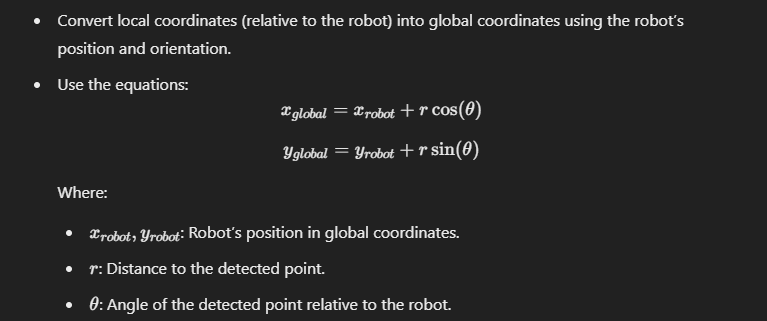

4. **Plot Points**:
   - Store the global coordinates in a list or file.
   - Use a plotting library (e.g., matplotlib in Python) to display the scatter plot.

---

#### **Applications of Scattergram Mapping**
1. **Simple Navigation Tasks**:
   - Used in environments with minimal uncertainties.
   - Suitable for robots with basic mapping capabilities.

2. **Exploration**:
   - Helps in visualising areas covered by the robot.

3. **Static Environments**:
   - Effective in environments where objects do not move.

---

#### **Challenges in Scattergram Mapping**
1. **Uncertainty**:
   - Real-world sensor data often includes noise, making the scattergram less reliable.
2. **Dynamic Environments**:
   - Moving objects are not accurately represented in a static scattergram.
3. **Global Coordination**:
   - Combining local maps into a global map requires precise robot localisation.

---

#### **How to Enhance Scattergram Mapping?**
1. **Integrate Probabilistic Models**:
   - Incorporate uncertainty into the map (e.g., using SLAM).
2. **Use Advanced Sensors**:
   - High-resolution LIDAR sensors reduce noise.
3. **Dynamic Updates**:
   - Continuously update the scattergram to reflect changes in the environment.

---


---
---

### **Section 2: Publishing Odometry Data**

This section discusses how to publish odometry data for a TurtleBot in the Gazebo simulator using ROS. Odometry data tracks the robot’s position and movement over time, which is essential for localisation and navigation tasks.

---

#### **What is Odometry?**
1. **Definition**:
   - Odometry is the process of calculating the position and orientation of a robot based on sensor data (e.g., wheel encoders, IMUs).
   - It uses motion data to estimate the robot’s position in a 2D or 3D space.

2. **Purpose**:
   - Provides real-time updates on the robot’s position for navigation and mapping.
   - Serves as an input for higher-level algorithms like SLAM.

---

#### **Key Components of Odometry in ROS**
1. **ROS Messages**:
   - Odometry data is published using the `nav_msgs/Odometry` message type.
   - This message contains:
     - **Pose**: Robot's position (x, y, z) and orientation (quaternion).
     - **Twist**: Linear and angular velocity.

2. **Coordinate Frames**:
   - ROS uses the **TF** library to handle transformations between coordinate frames.
   - Key frames for odometry:
     - **base_link**: Robot’s body frame.
     - **odom**: Fixed odometry frame representing the starting position.

3. **Simulation Environment**:
   - **Gazebo** is used to simulate the TurtleBot in a warehouse environment.
   - It provides realistic physics and sensor data for odometry testing.

---

#### **Steps to Publish Odometry Data**

1. **Launch the Simulation in Gazebo**:
   - Open ROS Development Studio or a terminal.
   - Use the `roslaunch` command to start the Gazebo simulation with the TurtleBot in a warehouse environment:
     ```bash
     $ roslaunch turtlebot3_gazebo turtlebot3_world.launch
     ```
   - The TurtleBot and its environment will be loaded into Gazebo.

2. **Create a ROS Node for Publishing Odometry**:
   - Write a Python or C++ script to calculate and publish odometry data.
   - The script should:
     - Use sensor data (e.g., wheel encoders or IMU) to compute the robot’s position and velocity.
     - Publish the data to the `/odom` topic.

3. **Sample Python Code for Odometry Publisher**:
   ```python
   #!/usr/bin/env python
   import rospy
   from nav_msgs.msg import Odometry
   from geometry_msgs.msg import Quaternion, Point, Pose, Twist, Vector3
   import tf
   import math

   def odometry_publisher():
       rospy.init_node('odometry_publisher', anonymous=True)
       odom_pub = rospy.Publisher('/odom', Odometry, queue_size=10)
       odom_broadcaster = tf.TransformBroadcaster()

       rate = rospy.Rate(10)  # 10 Hz
       x = 0.0
       y = 0.0
       th = 0.0
       vx = 0.1  # Linear velocity
       vy = 0.0
       vth = 0.1  # Angular velocity

       current_time = rospy.Time.now()
       last_time = rospy.Time.now()

       while not rospy.is_shutdown():
           current_time = rospy.Time.now()
           dt = (current_time - last_time).to_sec()
           delta_x = vx * math.cos(th) * dt
           delta_y = vy * math.sin(th) * dt
           delta_th = vth * dt

           x += delta_x
           y += delta_y
           th += delta_th

           odom_quat = tf.transformations.quaternion_from_euler(0, 0, th)

           # Publish the transform
           odom_broadcaster.sendTransform(
               (x, y, 0.),
               odom_quat,
               current_time,
               "base_link",
               "odom"
           )

           # Create and publish the odometry message
           odom = Odometry()
           odom.header.stamp = current_time
           odom.header.frame_id = "odom"

           odom.pose.pose = Pose(Point(x, y, 0.), Quaternion(*odom_quat))
           odom.child_frame_id = "base_link"
           odom.twist.twist = Twist(Vector3(vx, vy, 0), Vector3(0, 0, vth))

           odom_pub.publish(odom)
           last_time = current_time
           rate.sleep()

   if __name__ == '__main__':
       try:
           odometry_publisher()
       except rospy.ROSInterruptException:
           pass
   ```

---

#### **Explanation of the Code**
1. **Node Initialization**:
   - `rospy.init_node`: Initializes the ROS node.
   - `odometry_publisher`: Creates a publisher for the `/odom` topic.

2. **Publishing Odometry Data**:
   - Robot’s position (\(x, y\)), orientation (\(th\)), and velocities (\(vx, vth\)) are updated in real-time.
   - `Odometry` message contains the pose and velocity of the robot.

3. **TF Broadcasting**:
   - The `tf.TransformBroadcaster` ensures the `odom` and `base_link` frames are correctly aligned.

4. **Linear and Angular Velocities**:
   - Use simple equations of motion to calculate position and orientation over time.

---

#### **Testing and Visualisation**
1. **Check Odometry Topic**:
   - List active topics:
     ```bash
     $ rostopic list
     ```
   - Display messages on the `/odom` topic:
     ```bash
     $ rostopic echo /odom
     ```

2. **Visualise in RViz**:
   - Launch RViz to display the robot’s trajectory:
     ```bash
     $ roslaunch turtlebot3_gazebo turtlebot3_gazebo_rviz.launch
     ```

3. **Run the Odometry Publisher**:
   - Open a terminal and run the Python script:
     ```bash
     $ python odometry_publisher.py
     ```

---

#### **Applications of Odometry**
1. **Navigation**:
   - Helps the robot estimate its position when GPS or external references are unavailable.
2. **Mapping**:
   - Used as input for SLAM algorithms.
3. **Control**:
   - Provides feedback for motion planning and trajectory control.

---

#### **Challenges in Odometry**
1. **Sensor Noise**:
   - Errors in encoder or IMU readings lead to inaccuracies.
2. **Cumulative Drift**:
   - Small errors accumulate over time, causing the position to deviate.
3. **Dynamic Environments**:
   - Moving objects or uneven terrain introduce uncertainties.

---

This section concludes the discussion on publishing odometry data. Let me know if you’d like to proceed with additional sections or topics.

---
---

### **Section 3: Implementing Scattergram Mapping and Odometry Together**

This section integrates scattergram mapping with odometry to create a dynamic map of a robot’s environment. It uses odometry to track the robot’s position and scattergram mapping to represent the surrounding environment.

---

#### **Why Combine Scattergram Mapping with Odometry?**
1. **Complementary Functions**:
   - Odometry tracks the robot’s position and movement.
   - Scattergram mapping captures environmental features relative to the robot.
2. **Dynamic Updates**:
   - Integrating odometry enables real-time updates to the scattergram as the robot moves.
3. **Navigation Support**:
   - Provides a visual representation of obstacles and free space to assist in path planning.

---

#### **Key Steps for Integration**

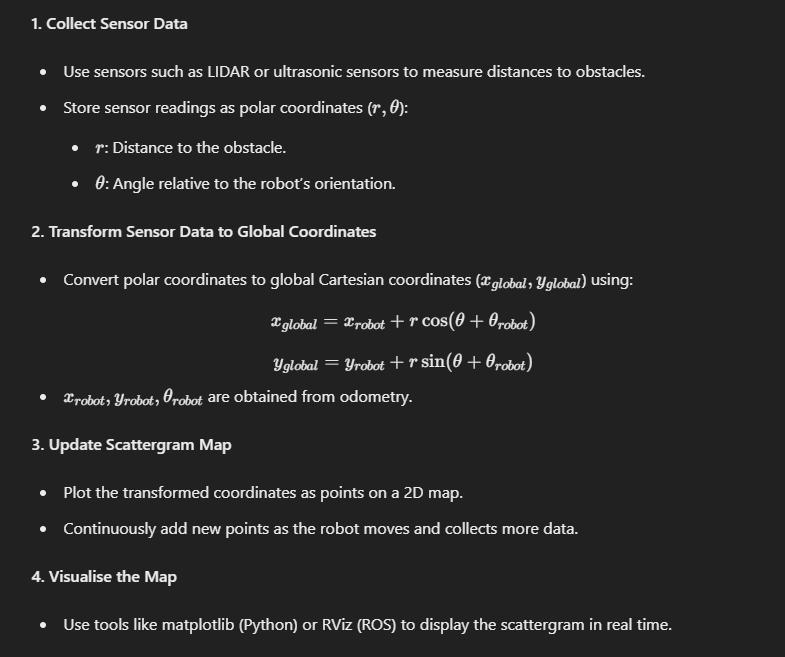


#### **Sample Implementation**

##### **Python Code for Integration**
```python
#!/usr/bin/env python
import rospy
from sensor_msgs.msg import LaserScan
from nav_msgs.msg import Odometry
import matplotlib.pyplot as plt
import math

# Global variables for storing data
robot_pose = {'x': 0.0, 'y': 0.0, 'theta': 0.0}
scattergram_data = []

def odom_callback(data):
    global robot_pose
    # Extract robot position and orientation from odometry data
    robot_pose['x'] = data.pose.pose.position.x
    robot_pose['y'] = data.pose.pose.position.y
    orientation_q = data.pose.pose.orientation
    _, _, robot_pose['theta'] = tf.transformations.euler_from_quaternion(
        [orientation_q.x, orientation_q.y, orientation_q.z, orientation_q.w]
    )

def laser_callback(data):
    global scattergram_data, robot_pose
    # Extract sensor data and transform to global coordinates
    ranges = data.ranges
    angle_min = data.angle_min
    angle_increment = data.angle_increment

    for i, r in enumerate(ranges):
        if r < data.range_max:  # Ignore invalid readings
            theta = angle_min + i * angle_increment
            x_global = robot_pose['x'] + r * math.cos(theta + robot_pose['theta'])
            y_global = robot_pose['y'] + r * math.sin(theta + robot_pose['theta'])
            scattergram_data.append((x_global, y_global))

def plot_scattergram():
    global scattergram_data
    x_coords, y_coords = zip(*scattergram_data)
    plt.scatter(x_coords, y_coords, s=1)  # Scatter plot with small points
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scattergram Map')
    plt.show()

if __name__ == '__main__':
    try:
        rospy.init_node('scattergram_mapping', anonymous=True)

        # Subscribe to odometry and LIDAR topics
        rospy.Subscriber('/odom', Odometry, odom_callback)
        rospy.Subscriber('/scan', LaserScan, laser_callback)

        # Allow time for data collection
        rospy.sleep(5)

        # Plot the scattergram map
        plot_scattergram()

    except rospy.ROSInterruptException:
        pass
```

---

#### **Explanation of the Code**
1. **Odometry Subscription**:
   - Updates the robot’s global position and orientation using `/odom`.

2. **LIDAR Subscription**:
   - Extracts distance and angle readings from the `/scan` topic.
   - Transforms the data into global coordinates using the robot’s position and orientation.

3. **Scattergram Plot**:
   - Accumulates global coordinates in a list.
   - Uses matplotlib to plot the points as a scattergram.

4. **Real-Time Operation**:
   - The robot continuously collects and maps data while moving.

---

#### **Challenges in Integration**
1. **Sensor Noise**:
   - Inaccuracies in LIDAR or odometry data can distort the scattergram.
2. **Cumulative Errors**:
   - Odometry drift affects the transformation of sensor data to global coordinates.
3. **Dynamic Environments**:
   - Moving objects can cause overlapping or inconsistent scattergram data.

---

#### **Solutions to Challenges**
1. **Noise Filtering**:
   - Use techniques like median filtering or Kalman filters to preprocess sensor data.
2. **Odometry Correction**:
   - Integrate odometry with SLAM to reduce drift.
3. **Dynamic Updates**:
   - Periodically refresh the scattergram to account for changes in the environment.

---

#### **Applications of Integrated Mapping**
1. **Autonomous Navigation**:
   - Provides a detailed representation of the environment for path planning.
2. **Exploration**:
   - Helps robots explore unknown areas by building maps incrementally.
3. **Obstacle Avoidance**:
   - Visualises obstacles for safer robot movement.

---

This section integrates scattergram mapping with odometry for dynamic map generation. Let me know if you’d like to proceed to the next section or elaborate on any specific part!

---
---

---
---